# Lab 2
## 1. VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH
### 1.1 Biến đổi cường độ ảnh (Image inverse transformation)

[[136 136 137 ... 122 122 123]
 [136 135 136 ... 116 125 126]
 [134 133 137 ... 122 128 123]
 ...
 [168 170 169 ... 177 174 174]
 [167 159 158 ... 171 172 177]
 [166 165 162 ... 176 174 174]]


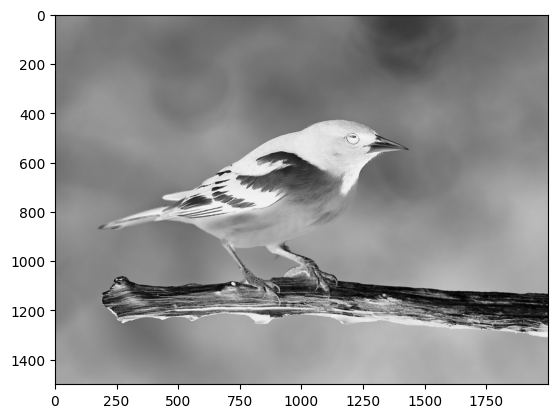

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

im_2 = 255 - im_1
print(im_2)

new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img, cmap="gray")
plt.show()

### 1.2 Thay đổi chất lượng ảnh với Power law (Gamma-Correction)

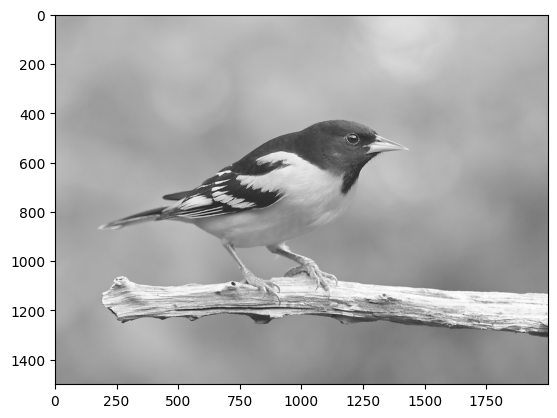

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

gamma = 0.5

b1 = im_1.astype(float)

b2 = np.max(b1)

b3 = (b1+1)/b2

b4 = np.log(b3) * gamma

c = np.exp(b4) * 255.0

c1 = c.astype(np.uint8)

d = Image.fromarray(c1)

img.show()
plt.imshow(d,cmap='gray')
plt.show()

### 1.3 Thay đổi cường độ điểm ảnh với Log Transformation

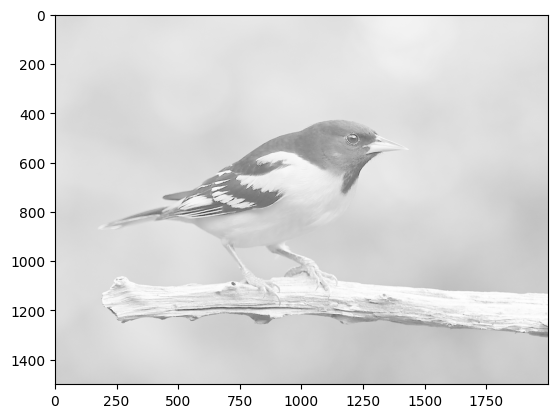

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

b1 = im_1.astype(float)

b2 = np.max(b1)

c = (128.0 * np.log(1 + b1))/np.log(1 + b2)

c1 = c.astype(np.uint8)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d,cmap='gray')
plt.show()

### 1.4 Histogram equalization

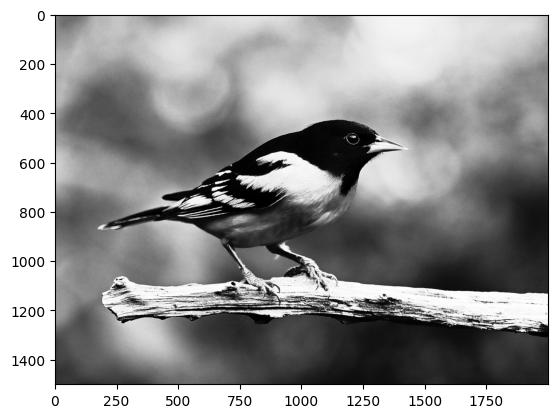

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im1 = np.asarray(img)

b1 = im1.flatten()

hist, bins = np.histogram(im1, 256, [0, 255])

cdf = hist.cumsum()

cdf_m = np.ma.masked_equal(cdf, 0)

num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf.min())
cdf_m = num_cdf_m / den_cdf_m

cdf = np.ma.filled(cdf_m, 0).astype('uint8')

im2 = cdf[b1]

im3 = np.reshape(im2, im1.shape)

im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4,cmap='gray')
plt.show()

### 1.5 Thay đổi ảnh với Contrast Stretching

0 255


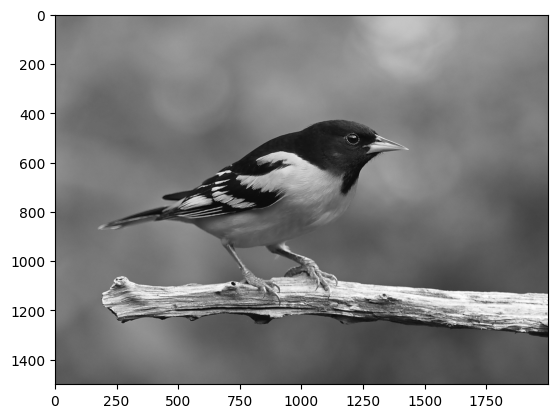

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im1 = np.asarray(img)

b = im1.max()
a = im1.min()
print(a, b)

c = im1.astype(float)

im2 = 255 * (c-a)/(b-a)

im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3,cmap='gray')
plt.show()

### 1.6 Biến đổi Fourier
#### 1.6.1 Biến đổi ảnh với Fast Fourier

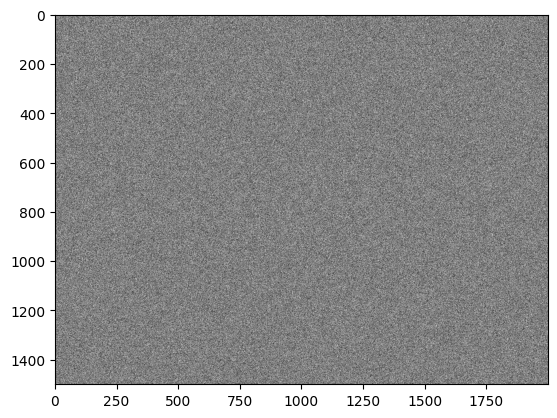

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im1 = np.asarray(img)

c = abs(scipy.fft.fft2(im1))

d = scipy.fft.fftshift(c)
d = d.astype(np.uint8)

im3 = Image.fromarray(d)

img.show()
im3.show()
plt.imshow(im3,cmap='gray')
plt.show()

#### 1.6.2 Lọc ảnh trong miền tần suất
Butterworth Lowpass Filter

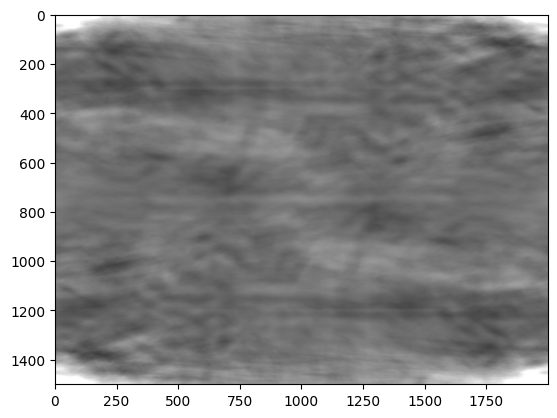

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Open a grayscale image
img = Image.open('bird.png').convert('L')

# Convert image to an ndarray
im1 = np.asarray(img)

# Performing FFT
c = abs(scipy.fftpack.fft2(im1))

# Shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

# Initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]

# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  # Cut-off radius

t1 = 1  # The order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# Defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        xl = (i - center1)**2 + (j - center2)**2  # Euclidean distance from origin
        r = math.sqrt(xl)
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t1)

# H is converted from ndarray to Image
H = H.astype(float)
h = Image.fromarray(H)

# Performing the convolution
con = d * H

# Computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))

# e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

# Display the images
img.show()
h.show()
im3.show()

plt.imshow(im3)
plt.show()


Butterworth Highpass Filter

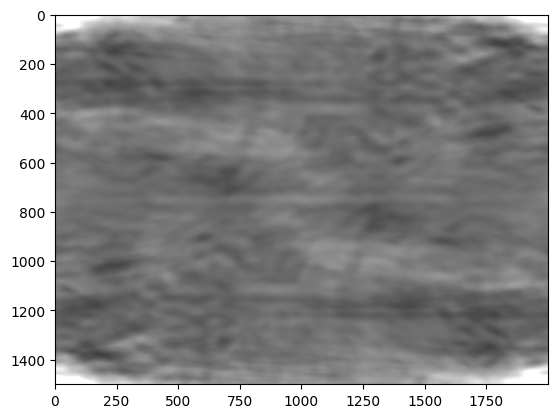

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Open a grayscale image
img = Image.open('bird.png').convert('L')

# Convert image into an ndarray
im1 = np.asarray(img)

# Performing FFT
c = abs(scipy.fftpack.fft2(im1))

# Shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

# Initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]

# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  # Cut-off radius
t1 = 1      # The order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# Defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        xl = (i - center1)**2 + (j - center2)**2  # Euclidean distance from origin is computed
        r = math.sqrt(xl)
        # Using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t2)

# H is converted from ndarray to image
H = H.astype(float)
h = Image.fromarray(H)

# Performing the convolution
con = d * H

# Computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))

# e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

# Show images
img.show()
h.show()
plt.imshow(im3)
plt.show()